This notebook contains code for visualization of time series models and their predictions (such as visualizing the subseries based on hour of day, and visualizing the calculated trend), and my demo is saved as my_app7 at the end of this notebook. 




In [0]:
import gluonts

In [0]:
import pydantic; print(pydantic.VERSION)

1.5


In [5]:
pip install python-dateutil==2.8.1

In [4]:
pip install pydantic==1.4

     |████████████████████████████████| 7.5MB 2.3MB/s 
  Found existing installation: pydantic 1.5.1
    Uninstalling pydantic-1.5.1:
      Successfully uninstalled pydantic-1.5.1


In [0]:
import gluonts
from gluonts.dataset.common import ListDataset

In [3]:
pip install gluonts

     |████████████████████████████████| 419kB 2.7MB/s 
     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 7.4MB 11.3MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68019 sha256=47e057480740d38699aa3ced3b4ab45e9cae9dc03d43d94dff4f52ab2ea660f9
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [2]:
#!pip install mxnet
pip install gluonts

SyntaxError: ignored

In [0]:
# step 1 
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# step 2
%cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [0]:
import pandas as pd
caisofile= 'CaisoJan19March19windsolarAvg.csv'
caiso_dataset = pd.read_csv(caisofile)

In [0]:
caiso_dataset=caiso_dataset.rename(columns={"ws_forecast (avg) (california_iso)": "iso"})
# Independent System Operator

In [0]:
caiso_arr = caiso_dataset['iso']

In [0]:
caiso_dataset.head()

,DateTime,iso
0,2019-01-01 00:00:00,-2.333
1,2019-01-01 01:00:00,-2.333
2,2019-01-01 02:00:00,-2.333
3,2019-01-01 03:00:00,-2.667
4,2019-01-01 04:00:00,-3.000


In [0]:
# step 1 g 
# ne step 1 g : hierarchical order dataframes creation

# break the array into k sub-arrays : day of the week

# hour of the day: morning 6 am to 12 pm, afternoon 12 pm to 6 pm, evening 6 pm to 12 am, early morning 12 am to 6 am 

colnames=["DateTime", "iso"]
# define empty dfs 
morningdf = pd.DataFrame(columns=colnames)
afternoondf = pd.DataFrame(columns=colnames)
eveningdf = pd.DataFrame(columns= colnames)
earlymorningdf= pd.DataFrame(columns= colnames)

morning_time = []
morning_iso = []

afternoon_time = []
afternoon_iso = []

evening_time = []
evening_iso = []

earlymorning_time = []
earlymorning_iso = []

for index, row in caiso_dataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= hour_min_sec[0]
    minute = hour_min_sec[1]   
    #print("hour", hour) 
    hour = float(hour)
    # determine zone
    if 0 <= hour <= 6:
      earlymorning_time.append(date_time)
      earlymorning_iso.append(iso_val)
    if 6 <= hour <=12:
      morning_time.append(date_time)
      morning_iso.append(iso_val)
    if 12 <= hour <= 18:
      afternoon_time.append(date_time)
      afternoon_iso.append(iso_val)
    if 18 <= hour <= 24:
      evening_time.append(date_time)
      evening_iso.append(iso_val)

# set dataframes

morningdf["DateTime"] = morning_time
morningdf["iso"] = morning_iso
earlymorningdf["DateTime"] = earlymorning_time
earlymorningdf["iso"]=earlymorning_iso
afternoondf["DateTime"] = afternoon_time
afternoondf["iso"] = afternoon_iso
eveningdf["DateTime"] = evening_time
eveningdf["iso"] = evening_iso

# use these as different series to draw xneg 


In [0]:
# make new df with diff columns where iso value is 0 if not in the right time 

column_names = ["DateTime", "morning","afternoon","evening", "earlymorning"]
hour_dataframe = pd.DataFrame(columns = column_names)



In [0]:
morning_iso = []

afternoon_iso = []

evening_iso = []

earlymorning_iso = []

dtime = []

for index, row in caiso_dataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= hour_min_sec[0]
    minute = hour_min_sec[1]   
    #print("hour", hour) 
    hour = float(hour)
    # append time 
    dtime.append(date_time)

    # determine zone
    if 0 <= hour < 6:
      earlymorning_iso.append(iso_val)
      morning_iso.append(float('nan'))
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
    if 6 <= hour <12:
      morning_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 12 <= hour < 18:
      afternoon_iso.append(iso_val)
      morning_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 18 <= hour < 24:
      evening_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      morning_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))


In [0]:
len(earlymorning_iso)

1415

In [0]:
len(dtime)

1415

In [0]:
hour_dataframe['DateTime'] = dtime
hour_dataframe['morning'] = morning_iso
hour_dataframe['earlymorning'] = earlymorning_iso
hour_dataframe['afternoon'] = afternoon_iso
hour_dataframe['evening'] = evening_iso

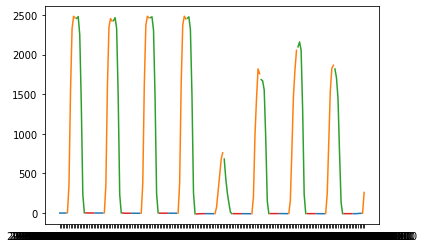

In [0]:
fig = plt.figure()

max_lim = 200

plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['earlymorning'][1:max_lim] )
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['morning'][1:max_lim])
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['afternoon'][1:max_lim])
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['evening'][1:max_lim])

#plt.ylim(-30, 500) Note: Add legend to id. colors 
plt.show()

In [0]:
float('nan')

ValueError: ignored

In [0]:
import matplotlib.pyplot as plt

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 75.0, 90.0) # change the interval values 
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [0]:
hour_dataframe['DateTime']

0       2019-01-01 00:00:00
1       2019-01-01 01:00:00
2       2019-01-01 02:00:00
3       2019-01-01 03:00:00
4       2019-01-01 04:00:00
               ...         
1410    2019-02-28 19:00:00
1411    2019-02-28 20:00:00
1412    2019-02-28 21:00:00
1413    2019-02-28 22:00:00
1414    2019-02-28 23:00:00
Name: DateTime, Length: 1415, dtype: object

In [0]:
hour_dataframe.iplot(kind='scatter', )

In [0]:
# other hier. plots

# plot diff months

# plot diff aggreg / iso table:  Real Time LMP, Day Ahead LMP, Real Time Load
# zone

# make hierarchy based on trend ? : calculate trend of various intervals and evaluate on smoothness of the line 


In [0]:
# calculate trend with rolling mean 

In [0]:
#@title trend with tsa decompose
# find the trend 

from statsmodels.tsa.seasonal import seasonal_decompose

# remove 0 and neg values
caiso_nonneg = caiso_dataset[caiso_dataset['iso']>0]

caiso_nonneg.head()

seas_result = seasonal_decompose(caiso_nonneg.iso, freq=5, model='multiplicative')
seas_result.plot()

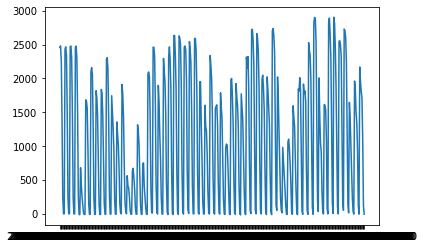

In [0]:
import pandas as pd
# dataframe that holds different hours
# create df with col names
#column_names = ["morning","afternoon","evening", "earlymorning"]
#hour_dataframe = pd.DataFrame(columns = column_names)
#hour_dataframe[]

# plot multiple dataframes 
import matplotlib.pyplot as plt

fig = plt.figure()

#for frame in [morningdf]: #, afternoondf, eveningdf
#  plt.plot(frame['DateTime'], frame['iso'])

#plt.plot(morningdf['DateTime'], morningdf['iso'])
plt.plot(afternoondf['DateTime'], afternoondf['iso'])


plt.show()

In [0]:
energy_series = caiso_dataset.loc[:, ('iso')]

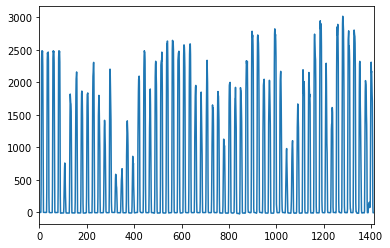

In [0]:
energy_series.plot()

In [0]:
import plotly

In [0]:
pip install plotly==3.10.0

     |████████████████████████████████| 41.5MB 114kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [0]:
energy_series.values

array([-2.333, -2.333, -2.333, ..., -4.667, -5.   , -5.333])

In [0]:
energy_data = go.Scatter(x=energy_series.index,
                         y=energy_series.values)

In [0]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [0]:
import plotly

In [0]:
plotly.tools.set_credentials_file(username='sy2657',                                              
                                  api_key='565mDD9ygRWTlWKfXuDb')

In [0]:
fig = go.Figure(data=[energy_data], layout=layout)
py.iplot(fig, sharing='public')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sy2657/0 or inside your Plotly account where it is named 'plot from API'


In [0]:
#https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af


In [0]:
# step 1 c
from gluonts.dataset.common import ListDataset

training_data_caiso = ListDataset(
    [{"start": "2019-01-01 00:00:00" , "target": caiso_dataset.iso.values}],
    freq = "1H"
)

In [0]:
# step 3- load into arrays 'watts' and 'time_stamps'
import csv
row_num = 0

watts = []
time_stamps =[]

with open('CD_INTERVAL_READING_ALL_NO_QUOTES.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
    row_num = row_num+1
    #print(row[0])
    sdata = row[1]
    tsplit = sdata.split(',')
    if row_num==1:
      continue
    #print(row[1])
    #print(tsplit[3])
    ntsplit = float(tsplit[3])
    watts.append(ntsplit)
    time_stamps.append(tsplit[0])
    #print(row[2])
    #print(row[3])
    #print(row[4])
    if row_num > 80000:
      break


In [0]:
watts[0]

0.141

In [0]:
# step 4
import numpy as np
awatts = np.array(watts)

In [0]:
# step 5
import pandas as pd
#import numpy as np
pred_length = 10


In [0]:
#@title
# step 6
from gluonts.dataset.common import ListDataset
start = pd.Timestamp(time_stamps[0], freq="0.5H")

ModuleNotFoundError: ignored

In [0]:
#@title
# step 7
#freq="0.5H"

pred_length = 3000
freq="0.5H"

train_ds1 = ListDataset([{'target': x, 'start': start} for x in awatts[:-pred_length]], freq = freq)

test_ds1 = ListDataset([{'target':x, 'start':start} for x in awatts], freq= freq)

In [0]:
#from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
#dataset = get_dataset("m4_hourly", regenerate= False)

INFO:root:downloading and processing m4_hourly


saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


In [0]:
freq

'0.5H'

In [0]:
#@title
# step 8
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.trainer import Trainer

estimator1 = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    prediction_length = pred_length,
    context_length = 100,
    freq= freq,
    trainer = Trainer(ctx="cpu",
                      epochs=5,
                      learning_rate=1e-3,
                      num_batches_per_epoch= 100)
)


predictor1 = estimator1.train(train_ds1)

from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds1,  # test dataset
    predictor=predictor1,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)


Create your own model:

1. define training + prediction network
2. define a new estimator that specifies any data processing and uses the networks

Rules (training and pred networks follow):

1. Both have a hybrid_forward method that defines what should happen when the network is called
2. training network's hybrid forward returns a loss based on prediction and true values
3. prediction network's hybrid_forward returns predictions

Rules (estimator follows):
1. include a create_transformation method that defines all possible feature transformations & how data is split during training
2. include a create_training_network method that returns training network configured with necessary hyperparameters
3. Include a create_predictor method that creates prediction network and returns Predictor object

A Predictor defines the predictor.predict method of a given predictor. This method takes the test dataset, it passes it through the prediction network to take the predictions, and yields the predictions. You can think of the Predictor object as a wrapper of the prediction network that defines its predict method.

Time Series model building (Sec. 2.6) 
A new model can be implemented using Estimator/Predictor API
In most cases, can create new model with GluonForecastEstimator, and implement/ configure the members and methods:
1. train_network_cls: NN that returns training loss for model, called during training
2. pred_network_cls: NN that uses same parameters as training network but instead of returning loss, returns forecast samp.s
3. create_transformation: method that returns transformation pipeline
4. forecast_cls: Forecast class that will be wrapped around output of the forecast network 


In [0]:
#@title
# step 8a 
# hybrid block
from mxnet import gluon
from gluonts.model.estimator import GluonEstimator
from gluonts.model.predictor import Predictor, RepresentableBlockPredictor
from gluonts.trainer import Trainer
from gluonts.transform import InstanceSplitter, FieldName, Transformation, ExpectedNumInstanceSampler
from gluonts.core.component import validated
from gluonts.support.util import copy_parameters 

#  gluonts.block.cnn.CausalConv1D 1D causal temporal convolution



class MyTrainNetwork(gluon.HybridBlock):

    def __init__(self, prediction_length, cells, act_type, **kwargs):

        super().__init__(**kwargs)

        self.prediction_length = prediction_length

        

        with self.name_scope():

            # set up a network that predicts the target

            #self.nn = mx.gluon.nn.HybridSequential()

            self.nn = gluon.nn.HybridSequential()    
            self.nn.add(gluon.nn.Dense(units=self.prediction_length, activation='relu'))
            self.nn.add(gluon.nn.Dense(units= 40, activation=act_type))
            self.nn.add(mx.gluon.nn.Dense(units=self.prediction_length, activation = 'softrelu'))    

    def hybrid_forward(self, F, past_target, future_target):

        prediction = self.nn(past_target)
        # calc L1 loss -> learn median
        return(prediction - future_target).abs().mean(axis=-1)

class MyPredNetwork(MyTrainNetwork):
    # The prediction network only receives past_target and returns predictions
    def hybrid_forward(self, F, past_target):
        prediction = self.nn(past_target)
        return prediction.expand_dims(axis=1)



        

ModuleNotFoundError: ignored

In [0]:
#@title
# estimator 1 (from tutorial)
class MyEstimator(GluonEstimator):
  @validated()
  def __init__(
      self,
      prediction_length:int,
      context_length:int,
      freq:str,
      num_cells:int,
      trainer:Trainer=Trainer()
  ) -> None:
    super().__init__(trainer=trainer)
    self.prediction_length = prediction_length
    self.context_length= context_length
    self.freq = freq
    self.num_cells= num_cells

In [0]:
#@title
# estimator 2 (from paper)

class MyEstimator(GluonEstimator):
  @validated()
  def __init__(
      self,
      freq:str,
      prediction_length:int,
      act_type:str= 'relu',
      context_length=int=20,
      cells: List[int]=[40,40,40],
      trainer:Trainer =Trainer(epochs=10)
  )-> None:
    super().__init__(trainer=trainer)
    self.freq = freq
    self.prediction_length = prediction_length
    self.act_type=act_type
    self.context_length= context_length
    self.cells=cells

# must transform features to date time features
  def create_transformation(self):
    # defines how train and test windows are cut
    # randomly select training samples from all series 
    return InstanceSplitter(
      target_field=FieldName.TARGET,
      is_pad_field=FieldName.IS_PAD,
      start_field=FieldName.START,
      forecast_start_field=FieldName.FORECAST_START,
      train_sampler=ExpectedNumInstanceSampler(num_instances=1),
      past_length=self.context_length,
      future_length=self.prediction_length,
)
    
  def create_training_network(self)->MyTrainNetwork:
    return MyTrainNetwork(
        prediction_length = self.prediction_length,
        cells=self.cells,
        act_type= self.act_type
    )
  
  def create_predictor(self, transformation: Transformation, trained_network: HybridBlock
    ) -> Predictor:
    prediction_network = MyPredNetwork(
        prediction_length = self.prediction_length,
        cells= self.cells,
        act_type = self.act_type
    )

    copy_parameters(trained_network, prediction_network)

    return RepresentableBlockPredictor(input_transform=transformation, 
                                       prediction_net =prediction_network,
                                       batch_size= self.trainer.batch_size,
                                       freq= self.freq,
                                       prediction_length=self.prediction_length,
                                       ctx=self.trainer.ctx)


In [0]:
# step 8b 
#custom estimator
class myEstimator1(GluonEstimator):
  

In [0]:
#step 9
predictor = estimator1.train(dataset.train)


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


Exception: ignored

In [0]:
from mxnet.gluon.loss import TripletLoss

interactive plot


In [0]:
import plotly
# Authenticate with your account

#plotly.tools.set_credentials_file(username='########',                                              
#                                  api_key='******')


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [0]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [0]:
 Get the steam data
steam_series = df.loc[:, ("Steam", "4")]
# Create the steam data object
steam_data = go.Scatter(x=steam_series.index,
                        y=steam_series.values,
                        # Specify axis
                        yaxis='y2')


graphics summary


jupyter-flex

voila 

dash, plotly 

matplotlib 


In [0]:
pip install jupyter-flex

     |████████████████████████████████| 2.8MB 3.5MB/s 
     |████████████████████████████████| 5.9MB 20.9MB/s 
     |████████████████████████████████| 921kB 50.5MB/s 
     |████████████████████████████████| 184kB 41.6MB/s 
  Created wheel for jupyter-flex: filename=jupyter_flex-0.5.0-py2.py3-none-any.whl size=2828957 sha256=bde4066afa8ed4c9b1295bfa7e081e0947b394976bc809fd0d8bd65cecda888f
  Stored in directory: /root/.cache/pip/wheels/36/8a/1a/6f4873ad0d59dc2a78d9fb07120d44242ff310822fd700a9b9
Successfully built jupyter-flex
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


In [0]:
pip install voila

In [0]:
# test trend on data 
import pandas as pd
caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

In [0]:
caiso_dataset.head()

,DateTime,iso,rolling_sum,rolling_mean
0,2020-01-01 00:00:00,9282,NaN,NaN
1,2020-01-01 01:00:00,8912,NaN,NaN
2,2020-01-01 02:00:00,8678,26872.0,8957.333333
3,2020-01-01 03:00:00,8549,26139.0,8713.000000
4,2020-01-01 04:00:00,8540,25767.0,8589.000000


In [0]:
arr = caiso_dataset['iso']
s = pd.Series(arr)

In [0]:
len(arr)

721

In [0]:
caiso_dataset['rolling_mean'] = s.rolling(3).mean()

In [0]:
# rolling sum -> trend

# rolling mean -> trend 
#pip install dash

windowperiod = 3 # input the window period

caiso_dataset['rolling_sum'] = caiso_dataset.rolling(windowperiod).sum()

#caiso_dataset['rolling_mean'] = caiso_dataset.rolling(windowperiod) 



NotImplementedError: ignored

In [0]:
# calculate trend
from scipy.stats import linregress

df1 = caiso_dataset # set dataframe 

# create trend 
trend_interval = 10

# x is just [1,2,3,4,5]
a= [1,2,3,4,5]
a = list(range(1, trend_interval+1))

div_by_trend = 0

# array holding the trend
array_trend = []
temp_trend= []

plot_trend = [] # array of pts 
temp_plot_trend = []

for ind in df1.index: 
  if div_by_trend==trend_interval:
    div_by_trend=1
    # calculate slope
    #print('a,', a)
    #print('temptrend,', temp_trend)
    trend = linregress(a, temp_trend)
    a_extend = [trend[0]]*trend_interval 
    array_trend.extend(a_extend)
    # calculate the pts to be plotted
    yintercept = temp_trend[0]
    temp_plot_trend.append(yintercept) 
    for j in range(1,trend_interval):
      temp_plot_trend.append(yintercept+ trend[0]*j)
    plot_trend.extend(temp_plot_trend)
    temp_plot_trend=[]
    temp_trend= []
    temp_trend.append(df1['iso'][ind]) # change 'val' to 'iso' 
    continue
  temp_trend.append(df1['iso'][ind])
  div_by_trend = div_by_trend+1
  
# also add for the last set of values
#for i in range(div_by_trend):
last_a = list(range(1, div_by_trend+1))
last_trend = linregress(last_a, temp_trend)
last_extend = [last_trend[0]]*div_by_trend
array_trend.extend(last_extend)
# plot
yintercept = temp_trend[0]
temp_plot_trend.append(yintercept)
for j in range(1, div_by_trend):
  temp_plot_trend.append(yintercept+ trend[0]*j)
plot_trend.extend(temp_plot_trend)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [0]:
 ax = list(range(1, 722))


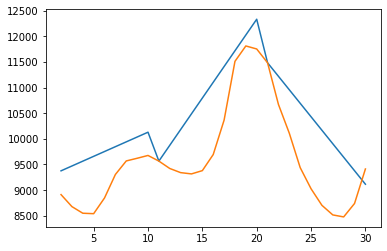

In [0]:
import matplotlib.pyplot as plt

plt.plot(ax[1:30], plot_trend[1:30])
plt.plot(ax[1:30], arr[1:30])
plt.show()

In [0]:
array_trend

[-184.70000000000002,
 -184.70000000000002,
 -184.70000000000002,
 -184.70000000000002,
 -184.70000000000002,
 197.4,
 197.4,
 197.4,
 197.4,
 197.4,
 -47.800000000000004,
 -47.800000000000004,
 -47.800000000000004,
 -47.800000000000004,
 -47.800000000000004,
 556.5,
 556.5,
 556.5,
 556.5,
 556.5,
 -614.6,
 -614.6,
 -614.6,
 -614.6,
 -614.6,
 164.10000000000002,
 164.10000000000002,
 164.10000000000002,
 164.10000000000002,
 164.10000000000002,
 -40.0,
 -40.0,
 -40.0,
 -40.0,
 -40.0,
 47.6,
 47.6,
 47.6,
 47.6,
 47.6,
 146.5,
 146.5,
 146.5,
 146.5,
 146.5,
 -630.9000000000001,
 -630.9000000000001,
 -630.9000000000001,
 -630.9000000000001,
 -630.9000000000001,
 477.3,
 477.3,
 477.3,
 477.3,
 477.3,
 -264.3,
 -264.3,
 -264.3,
 -264.3,
 -264.3,
 286.3,
 286.3,
 286.3,
 286.3,
 286.3,
 -303.8,
 -303.8,
 -303.8,
 -303.8,
 -303.8,
 -434.3,
 -434.3,
 -434.3,
 -434.3,
 -434.3,
 307.3,
 307.3,
 307.3,
 307.3,
 307.3,
 -102.60000000000001,
 -102.60000000000001,
 -102.60000000000001,
 -102.600

In [0]:
import pandas as pd 
df1 = pd.DataFrame(columns = ['time', 'val'])
df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

#for ind in df1.index: 
#  print(df1['val'][ind])

In [0]:
#@title linregress ex
from scipy.stats import linregress
a = [ 1,2,3, 4.5]
#ab = linregress(a)

ar =list(range(5))

In [0]:
ab[0]

1.25

In [0]:
#pip install dash-renderer
#pip install dash-html-components
pip install dash-core-components 

In [0]:
import plotly

In [0]:
import dash
import dash_core_components as dcc
import dash_html_components as html 


ModuleNotFoundError: ignored

In [0]:
%%writefile my_app1.py

import dash
import dash_core_components as dcc
import dash_html_components as html

app1 = dash.Dash()

app1.layout = html.Div(children = [html.H1('dash tutor.'),
    dcc.Graph(id ='example', 
              figure = {
                  'data':[{'x':[1,2,3,4,5], 'y':[5,4,3,2,1], 'type':'line', 'name':'boats'},
                          {'x':[1,2,3,4,5], 'y':[5,4,3,2,1], 'type':'bar', 'name':'cats'}],
                        'layout': {
                            'title':'Basic dash ex. '
                        }
              })
] )

if __name__ == '__main__':
  app1.run_server(debug=True)


Writing my_app1.py


In [0]:
pip install dash-renderer

In [0]:
# required 
pip install dash==1.8.0

In [0]:
!python my_app1.py

Running on http://127.0.0.1:8050/
Debugger PIN: 999-314-989
 * Serving Flask app "my_app1" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 646-814-211


In [0]:
from dash.dependencies import Input, Output

app2 = dash.Dash()

app2.layout = dhtml.Div(children=[
   dcc.Input(id = 'input', value='Enter something', type='text'),
   dhtml.Div(id='output')                                  
])
# wrapper
@app2.callback(
    Output(component_id ='output', component_property='children'), 
    [Input(component_id ='input', component_property ='value')]
)

def update_value(input_data):
  #return "Input: {}".format(input_data) 
  try:
    return str(float(input_data)**2)
  except:
    return "some error"

ModuleNotFoundError: ignored

In [0]:
import datetime

# load dataframe

In [0]:
#pip install jupyterlab-dash

In [0]:
import jupyterlab_dash
import dash
import dash_html_components as html

In [0]:
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
viewer = jupyterlab_dash.AppViewer()

app= dash.Dash("hi")
app.layout = html.Div('Hello World')

viewer.show(app)

In [0]:
#!pip install dash
#!pip install colour
#!pip install jupyter_plotly_dash
#!pip install jupyterlab
#!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3

#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip

In [0]:
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [0]:
# required 
pip install dash==1.8.0

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 1.1MB 7.6MB/s 
     |████████████████████████████████| 3.3MB 32.4MB/s 
     |████████████████████████████████| 194kB 43.7MB/s 
     |████████████████████████████████| 1.8MB 43.3MB/s 
     |████████████████████████████████| 358kB 38.7MB/s 
  Created wheel for dash: filename=dash-1.8.0-cp36-none-any.whl size=71494 sha256=a5aced5f515ac322eb77500632457afc36f4ac37ba844c7202c785a77b034571
  Stored in directory: /root/.cache/pip/wheels/ab/18/4f/810b70747c57b8dd0432a8801bd3a2f44bb7ed59a8b1947eca
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=556465aa800525630930460b0b0835d95932075f6b99e5c76feedd2df5ce14c9
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.2.3-cp36-none-any.whl size=1146786 sha256=d60936ea941cce3739c7030f0363e19333a0ec

In [0]:
# do this after pip install dash 
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')


--2020-05-06 19:18:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.192.215.160, 52.73.120.139, 3.95.144.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.192.215.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  54.3MB/s    in 0.2s    

2020-05-06 19:18:24 (54.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
#@title
pip install dash
### Get the public URL where you can access the Dash app. Copy this URL.
#! curl -s http://localhost:4040/api/tunnels | python3 -c \
#    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash

#!pip install dash==0.31.1  # The core dash backend
#!pip install dash-html-components==0.13.2  # HTML components
#!pip install dash-core-components==0.39.0  # Supercharged components
#!pip install dash-table==3.1.7

ModuleNotFoundError: ignored

In [0]:
# do this after install above
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://c44e1742.ngrok.io


In [0]:
# synthetic generation of time series

In [0]:
# sample dataframe
import pandas as pd 
df1 = pd.DataFrame(columns = ['time', 'val'])
df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

In [0]:
df1.val

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    11
Name: val, dtype: int64

html code  experimenting : 

In [0]:
# dynamic graph app
%%writefile my_app2.py

import dash
import dash_core_components as dcc
import dash_html_components as html

from dash.dependencies import Input, Output 

import pandas as pd 



#df1 = pd.DataFrame(columns = ['time', 'val'])
#df1['val'] = [1,2,3,4,5, 6,7,8,9,11]



caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

caiso_dataset=caiso_dataset.rename(columns={"sys_load_rsrc (TAC_NORTH) (california_iso)": "iso"})

df1 = caiso_dataset

appdynamic = dash.Dash()

colors = {
    'background': '#E5DBA3',
    'text': '#56D85D',
    'text2': '#194380'
}

appdynamic.layout = html.Div(style={'backgroundColor': colors['background']}, children=[html.H1(children='hello dash', style={
            'textAlign': 'center',
            'color': colors['text']
        }), html.Div(children='web application for python'), 
            html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ), html.Label('Text Input'),
    dcc.Input(value='enter window value (int)', type='text'), # convert to number

                                       dcc.Graph(id='example-graph', 
                                                 figure = {
                                                     'data': [ {'x': df1.DateTime, 'y':df1.iso, 'type':'line', 'name':'stock' } ],
                                                     'layout': {
                                                         
                                                     }
                                                 })
                                       ])

# call back for type of data (region)
@appdynamic.callback()

@appdynamic.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id='input'), component_property='value']
)

def update_graph(input_data):

if __name__ == '__main__':
    appdynamic.run_server(debug=True)


Overwriting my_app2.py


In [0]:
!python my_app2.py 

Running on http://127.0.0.1:8050/
Debugger PIN: 310-192-048
 * Serving Flask app "my_app2" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Traceback (most recent call last):
  File "/content/my_app2.py", line 2, in <module>
    import dash
  File "/usr/local/lib/python3.6/dist-packages/dash/__init__.py", line 1, in <module>
    from .dash import Dash, no_update  # noqa: F401
  File "/usr/local/lib/python3.6/dist-packages/dash/dash.py", line 23, in <module>
    import plotly
  File "/usr/local/lib/python3.6/dist-packages/plotly/__init__.py", line 30, in <module>
    from plotly import (
  File "/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/__init__.py", line 98093, in <module>
    from plotly.graph_objs import histogram2dcontour
  File "/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/histogram2dcontour/__init__.py", line 3823, in <module>
    from plotly.graph_objs.histogram2dcontour import colorbar
  File "/usr/lo

In [0]:
# dyn graph app 

# dynamic graph app
%%writefile my_app3.py

import dash
import dash_core_components as dcc
import dash_html_components as html

from dash.dependencies import Input, Output 

import pandas as pd 
import matplotlib.pyplot as plt 
import base64

#df1 = pd.DataFrame(columns = ['time', 'val'])
#df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)


caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

df1 = caiso_dataset

appdynamic3 = dash.Dash()

colors = {
    'background': '#E5DBA3',
    'text': '#56D85D',
    'text2': '#194380'
}

appdynamic3.layout = html.Div(style={'backgroundColor': colors['background']}, children=[html.H1(children='hello dash', style={
            'textAlign': 'center',
            'color': colors['text']
        }), html.Div(children='web application for python'), 
            html.Label('Dropdown to pick region'),
    dcc.Dropdown(
        id='regoption',
        options=[
            {'label':'California', 'value': 'CA'},
            {'label': 'New York ', 'value': 'NY'}, # value: 'NYC'
            {'label': 'Southwest', 'value': 'SW'},
            {'label': 'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='region'
    ), 
    html.Label('Text Input'),

    dcc.Input(id='input', value='enter window value (int)', type='text'), # convert to number
    html.Div(id= 'output=graph')
                                       ])

# call back for type of data (region)
#@appdynamic3.callback()
#def update_dataset():

@appdynamic3.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id='input')]
)

def update_graph(input_data): # pred length, batch size, epochs 
  print("input:",input_data)
  from gluonts.model.deepar import DeepAREstimator
  from gluonts.trainer import Trainer
  from gluonts.dataset.common import ListDataset
  firsttimestamp = df1['DateTime'][0]
  # training 
  training_data = ListDataset([{"start": firsttimestamp, "target": df1.iso.values}], freq = "1H")
  # test dataset
  test_df = df1[200:250] # choose a range
  test_firsttimestamp = test_df['DateTime'][0]
  test_data = ListDataset([{"start": test_firsttimestamp, "target": test_df.iso.values}], freq="1H")
  # run model 
  estimator = DeepAREstimator(freq="1H", prediction_length=input_data, trainer=Trainer(epochs=10,batch_size=10))
  predictor = estimator.train(training_data=training_data)

  # accuracy and predict
  from gluonts.evaluation.backtest import make_evaluation_predictions
  deepare_forecast_it, deepare_ts_it = make_evaluation_predictions(dataset=test_data, predictor=predictor, num_samples=20)
  deepare_forecasts = list(deepare_forecast_it)
  deepare_tss = list(deepare_ts_it)
  d_ts_entry = deepare_tss[0]
  d_forecast_entry= deepare_forecasts[0]
  # try random graph 
  fig, ax1 = plt.subplots(1,1)
  np.random.seed(len(input_value))
  ax1.matshow(np.random.uniform(-1,1, size = (12, 10)))
  ax1.set_title(input_value)
  out_url = fig_to_uri(fig)
  return out_url



if __name__ == '__main__':
    appdynamic.run_server(debug=True)


Overwriting my_app3.py


In [0]:
!python my_app3.py

Traceback (most recent call last):
  File "my_app3.py", line 73, in <module>
    [Input(component_id='input')]
TypeError: __init__() missing 1 required positional argument: 'component_property'


In [0]:
%%writefile my_app4.py
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd 
import matplotlib.pyplot as plt 
#import base64
import numpy as np 
#from io import BytesIO 
import plotly.tools as tls 

df1 = pd.DataFrame(columns = ['time', 'val1', 'val2'])
df1['time'] = [1,2,3,4,5,6,7,8,9,10]
df1['val1'] = [1,2,3,4,5, 6,7,8,9,11]
df1['val2'] = [11,12,23,2,9, 16,3,5,9,3]

app = dash.Dash('multiple_lines')

app.layout = html.Div([
    dcc.Input(id='my-id', value=5, type='number'),
    dcc.Graph(id='graph_energy')
])


@app.callback(
    Output(component_id='graph_energy', component_property='figure'), # component_property='children'
    [Input(component_id='my-id', component_property='value')]
)
def update_graph(input_value):
  fig = tls.make_subplots(rows=2, cols= 1, shared_xaxes=True)
  fig['layout']['margin'] = {'l':30, 'r':10, 'b':50, 't':25}
  fig.append_trace({'x': df1.time, 'y':df1.val1, 'type': 'scatter', 'name':'values1'},1,1)
  fig.append_trace({'x': df1.time, 'y': df1.val2, 'type':'scatter', 'name':'values2'},1,1)
  return fig   


if __name__ == '__main__':
    app.run_server(debug=True)

Overwriting my_app4.py


In [0]:
!python my_app4.py

Running on http://127.0.0.1:8050/
Debugger PIN: 187-507-663
 * Serving Flask app "multiple_lines" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 348-229-796
/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [0]:
#import matplotlib.pyplot as plt
#plt.plot(10)
#plt.show()
import gluonts

ModuleNotFoundError: ignored

In [0]:
%%writefile my_app5.py
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd 

df1 = pd.DataFrame(columns = ['time', 'val1', 'val2'])
df1['time'] = [1,2,3,4,5,6,7,8,9,10]
df1['val1'] = [1,2,3,4,5, 6,7,8,9,11]
df1['val2'] = [11,12,23,2,9, 16,3,5,9,3]

app = dash.Dash()

app.layout= html.Div(children = [
                                 html.Div(children="Energy forecasting"),
                                 dcc.Input(id='input', value=5, type='number'),
                                 html.Div(id='output-graph'), # time series and predictions (and conf. intervals )
                                 html.Div(id='output-graph2'),# another output graph for trend
                                 html.Div(id='output-graph3') # output graph for hour of day 
                                 # display recommended power consumption 
])

@app.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id ='input', component_property='value')]
)

def update_graph(input_data):
  return dcc.Graph(id='ex-graph',
                   figure = {
                       'data': [{'x': df1.time, 'y': df1.val1, 'type':'line', 'name':'values1' },
                                {'x': df1.time, 'y': df1.val2, 'type':'line', 'name':'values2'}],
                       'layout':{'title': input_data}
                   })
  
if __name__=='__main__':
  app.run_server(debug=True)

Writing my_app5.py


In [0]:
!python my_app5.py

Running on http://127.0.0.1:8050/
Debugger PIN: 347-393-071
 * Serving Flask app "my_app5" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 426-361-172


In [0]:
#!pip install mxnet
#pip install gluonts

In [8]:
pip install dash==1.8.0

     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 1.1MB 6.8MB/s 
     |████████████████████████████████| 3.3MB 16.2MB/s 
     |████████████████████████████████| 194kB 33.6MB/s 
     |████████████████████████████████| 1.8MB 34.4MB/s 
     |████████████████████████████████| 358kB 46.2MB/s 
  Created wheel for dash: filename=dash-1.8.0-cp36-none-any.whl size=71494 sha256=fd26f417395b4f5b75265fb0c79a00157ce2c00ce65747910da154e1ff165c43
  Stored in directory: /root/.cache/pip/wheels/ab/18/4f/810b70747c57b8dd0432a8801bd3a2f44bb7ed59a8b1947eca
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=4946e5bba17c3424c8422517f61e0d02f9b4adffdc31f62a8df4f0875c4da79d
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.2.3-cp36-none-any.whl size=1146786 sha256=c5626ccfd6e12b2433b7e80cbf09a55be62861

In [7]:
#pip install pydantic==1.4
#pip install python-dateutil==2.8.1
pip install dash==1.8.0

SyntaxError: ignored

In [1]:
# do this after pip install dash 
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')


--2020-05-16 00:19:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.90.94.177, 54.159.115.94, 52.203.131.51, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.90.94.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  12.9MB/s    in 1.0s    

2020-05-16 00:19:58 (12.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [2]:
# do this after install above
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://6d23870c.ngrok.io


In [0]:
%%writefile my_app6.py
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd 

import gluonts
import mxnet 

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator

from gluonts.evaluation.backtest import make_evaluation_predictions

#caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
ne_url ='https://raw.githubusercontent.com/sy2657/representation_learning/master/neweng_jan2020.csv'
edataset = pd.read_csv(ne_url) # energy dataset
#normalize
normalized = edataset
# normalize new eng dataframe
emax = edataset['iso'].max()

emin = edataset['iso'].min()

normalized['iso'] = (edataset['iso'] - emin)/(emax - emin)

a = list(range(722))

from gluonts.dataset.common import ListDataset

datestart = edataset['DateTime'][0] 

norm_training_data = ListDataset([{"start":datestart, "target": normalized.iso.values}], freq = "1H")

app = dash.Dash()

app.layout= html.Div(children = [
                                 html.Div(children="Energy forecasting"),
                                 dcc.Input(id='input', value=5, type='number', placeholder="prediction length"),
                                 dcc.Input(id='input-day', value=5, type='number', placeholder="day of month"), # choose start date and hour 
                                 dcc.Input(id='input-hour', value=1, type='number', placeholder="starting hour of day"),
                                 # dropdown of region -> use this input to multiple callbacks 
                                 html.Div(id='output-graph'), # time series and predictions (and conf. intervals )
                                 html.Div(id='output-graph2'),# another output graph for trend
                                 html.Div(id='output-graph3') # output graph for hour of day 
                                 # display recommended power consumption 
])

@app.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id ='input', component_property='value'),
     Input(component_id ='input-day', component_property='value'), # input_data2
     Input(component_id ='input-hour', component_property='value')] # input_data3
)

def update_graph(input_data, input_data2, input_data3):
  # gluonts 
  # determine row with the approp. day and hour 
  for index, row in edataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= float(hour_min_sec[0])
    # determine day 
    dat = split_date_time[0]
    dat1 = dat.split("-")
    day = float(dat1[1])
    if day == input_data2 and hour == input_data3:
      test_index = index

      break
  # test series 
  norm_test = normalized[test_index: test_index+input_data]
  norm_test_dataset = ListDataset([{"start": date_time, "target": norm_test.iso.values}], freq = "1H")
  # model 1 
  estimator1 = DeepAREstimator(freq="1H", prediction_length=input_data, trainer=Trainer(epochs=10,batch_size=10))
  predictor1 = estimator1.train(training_data=norm_training_data) 
  deepare_forecast_it, deepare_ts_it = make_evaluation_predictions(dataset=norm_test_dataset, predictor=predictor1, num_samples=10) 
  deepare_forecasts = list(deepare_forecast_it)
  deepare_tss = list(deepare_ts_it)
  dm = deepare_forecasts[0].mean
  #df = deepare_forecasts[0].quantile(0.5) 
  return dcc.Graph(id='ex-graph',
                   figure = {
                       'data': [{'x': normalized.DateTime, 'y': normalized.iso, 'type':'line', 'name':'orig. time series values' },
                                {'x': norm_test_dataset.DateTime, 'y': dm, 'type':'line', 'name':'prediction'}],
                       'layout':{'title': 'DeepARE prediction'}
                   })
  
if __name__=='__main__':
  app.run_server(debug=True)

Writing my_app6.py


In [0]:
!python my_app6.py

INFO:root:Using CPU
INFO:root:Using CPU
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
Running on http://127.0.0.1:8050/
INFO:__main__:Running on http://127.0.0.1:8050/
Debugger PIN: 548-941-763
INFO:__main__:Debugger PIN: 548-941-763
 * Serving Flask app "my_app6" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
INFO:root:Using CPU
INFO:root:Using CPU
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
Running on http://127.0.0.1:8050/
INFO:__main__:Running on http://127.0.0.1:8050/
Debugger PIN: 612-918-197
INFO:__main__:Debugger PIN: 612-918-197


In [0]:

# model 2 
  estimator_simple = SimpleFeedForwardEstimator(
    prediction_length = input_data,
    context_length = 100,
    freq="1H",
    trainer= Trainer(ctx="cpu", epochs=5, learning_rate=1e-3, hybridize=True, num_batches_per_epoch=50))
  predictor_simple = estimator_simple.train(norm_training_data)

In [0]:
from google.colab import files

uploaded = files.upload()

#p = pd.read_csv("NewEnglandNov19WindSolar.csv")
#p.head()

Saving NewEnglandNov19WindSolar.csv to NewEnglandNov19WindSolar.csv


In [0]:
import pandas as pd
purl ='https://raw.githubusercontent.com/sy2657/representation_learning/master/deepareNewEngNov201index100to150csv9len30'
predictions = pd.read_csv(purl)


In [0]:
#task : save predictions based on triplet loss 

In [0]:

normalized = edataset
# normalize new eng dataframe
emax = edataset['iso'].max()

emin = edataset['iso'].min()

normalized['iso'] = (edataset['iso'] - emin)/(emax - emin)


In [3]:
%%writefile my_app7.py
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd 

import gluonts
import mxnet 

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator

from gluonts.evaluation.backtest import make_evaluation_predictions

caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
#ne_url ='https://raw.githubusercontent.com/sy2657/representation_learning/master/neweng_jan2020.csv'

ne_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/NewEnglandNov19WindSolar.csv'
edataset = pd.read_csv(ne_url) # energy dataset

purl1 ='https://raw.githubusercontent.com/sy2657/representation_learning/master/deepareNewEngNov201index100to150csv9len30'
predictions1 = pd.read_csv(purl1)

apredictions1 = predictions1['iso']

#newengland = 'NewEnglandNov19WindSolar.csv'
#neweng_dataset = pd.read_csv(newengland)
#neweng_dataset =neweng_dataset.rename(columns={"ws_forecast (sum) (california_iso)": "iso"})
#edataset = neweng_dataset

#normalize

emax = edataset['iso'].max()
#print(ne_max)
emin = edataset['iso'].min()

elen = len(edataset)
a = list(range(elen))

from gluonts.dataset.common import ListDataset

datestart = edataset['DateTime'][0] 

training_data = ListDataset([{"start":datestart, "target": edataset.iso.values}], freq = "1H")
#norm_training_data = ListDataset([{"start":datestart, "target": normalized.iso.values}], freq = "1H")

app = dash.Dash()

app.layout= html.Div(children = [
                                 html.Div(children="Energy forecasting"),
                                 html.Div([ html.P('Enter (custom) prediction length, day of month, and starting hour')]),
                                 dcc.Input(id='input', value=30, type='number', placeholder="prediction length"),
                                 dcc.Input(id='input-day', value=15, type='number', placeholder="day of month"), # choose start date and hour 
                                 dcc.Input(id='input-hour', value=11, type='number', placeholder="starting hour of day"),
                                 dcc.RadioItems(id='chooseregion', options = [{'label':'California', 'value':'ca'}, {'label':'New England', 'value':'ne'}], value='ne'),
                                 # dropdown of region -> use this input to multiple callbacks 
                                 html.Div(id='output-graph'), # time series and predictions (and conf. intervals 
                                 dcc.Checklist(id='hier', options=[{'label':'early morning', 'value':'earlymorning'},
                                               {'label':'morning', 'value': 'morning'},
                                               {'label':'afternoon', 'value':'afternoon'},
                                               {'label':'evening', 'value':'evening'}], value=['morning']),
                                 html.Div(id='output-graph3'), # output graph for hour of day 
                                 # input for trend: window size 
                                 dcc.Input(id='input-window', value=3, type='number', placeholder ="trend window length"),
                                 html.Div(id='output-graph2')# another output graph for trend
                                 # display recommended power consumption 
])



@app.callback(Output(component_id = 'output-graph3', component_property='children'),
              [Input(component_id='hier', component_property='value'), Input(component_id='chooseregion', component_property='value')])
def update_hour_graph(input_values, reg_value):
  if reg_value=='ca':
    edataset2 =  pd.read_csv(caiso_url)
  if reg_value=='ne':
    edataset2 = pd.read_csv(ne_url)
  morning_iso = []
  afternoon_iso = []
  evening_iso = []
  earlymorning_iso = []
  dtime = []
  nanarray = []
  for index, row in edataset2.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    hour= float(hour_min_sec[0])
    dtime.append(date_time)
    nanarray.append(float('nan'))
    if 0 <= hour < 6:
      earlymorning_iso.append(iso_val)
      morning_iso.append(float('nan'))
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
    if 6 <= hour <12:
      morning_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 12 <= hour < 18:
      afternoon_iso.append(iso_val)
      morning_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 18 <= hour < 24:
      evening_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      morning_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
  max_lim = 300
  min_lim = 100
  ivalues = input_values
  if 'earlymorning' not in ivalues:
    earlymorning_iso = nanarray
  if 'morning' not in ivalues:
    morning_iso = nanarray
  if 'afternoon' not in ivalues:
    afternoon_iso = nanarray
  if 'evening' not in ivalues:
    evening_iso = nanarray
  return dcc.Graph(id='ex-graph3',
                   figure = {
                       'data': [{'x': dtime[min_lim:max_lim], 'y': earlymorning_iso[min_lim:max_lim], 'type':'line', 'name':'early morning' },
                                {'x': dtime[min_lim:max_lim], 'y': morning_iso[min_lim:max_lim], 'type': 'line', 'name':' morning'},
                                {'x': dtime[min_lim:max_lim], 'y': afternoon_iso[min_lim:max_lim], 'type': 'line', 'name':'afternoon'},
                                {'x': dtime[min_lim:max_lim], 'y': evening_iso[min_lim:max_lim], 'type': 'line', 'name': 'evening'}],
                       'layout':{'title': 'Hier. time series divided by hour of day'}
                   })
  
# trend update
@app.callback(Output(component_id = 'output-graph2', component_property='children'),
              [Input(component_id='input-window', component_property='value')])

def update_trend_graph(input_win):
  arr = edataset['iso']
  s = pd.Series(arr)
  edataset['rolling_mean'] = s.rolling(input_win).mean()
  from scipy.stats import linregress
  trend_interval = 5 
  a = list(range(1, trend_interval+1))
  div_by_trend = 0
  # array holding the trend
  array_trend = []
  temp_trend= []
  plot_trend = [] # array of pts 
  temp_plot_trend = []
  for ind in edataset.index:
    if div_by_trend==trend_interval:
      div_by_trend=1
      # calculate slope
      trend = linregress(a, temp_trend)
      a_extend = [trend[0]]*trend_interval 
      array_trend.extend(a_extend)
      # calculate the pts to be plotted
      yintercept = temp_trend[0]
      temp_plot_trend.append(yintercept) 
      for j in range(1,trend_interval):
        temp_plot_trend.append(yintercept+ trend[0]*j)
      plot_trend.extend(temp_plot_trend)
      temp_plot_trend=[]
      temp_trend= []
      temp_trend.append(edataset['rolling_mean'][ind]) # change 'iso' to rollingmean 
      continue
    temp_trend.append(edataset['rolling_mean'][ind])
    div_by_trend = div_by_trend+1
  # last set of values
  last_a = list(range(1, div_by_trend+1))
  last_trend = linregress(last_a, temp_trend)
  last_extend = [last_trend[0]]*div_by_trend
  array_trend.extend(last_extend)
  # plot
  yintercept = temp_trend[0]
  temp_plot_trend.append(yintercept)
  for j in range(1, div_by_trend):
    temp_plot_trend.append(yintercept+ last_trend[0]*j)
  plot_trend.extend(temp_plot_trend)
  return html.Div(dcc.Graph(id='ex-graph2',
                   figure = {
                       'data': [{'x': edataset.DateTime[1:30], 'y': edataset.iso[1:30], 'type':'line', 'name':'orig. time series values' },
                                {'x': edataset.DateTime[1:30], 'y': plot_trend[1:30], 'type': 'line', 'name':'trend lines '}],
                       'layout':{'title': 'DeepARE prediction'}
                   }))

  

@app.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id ='input', component_property ='value'),
     Input(component_id ='input-day', component_property='value'), # input_data2
     Input(component_id ='input-hour', component_property= 'value') # input_data3
]
)

def update_graph(input_data, input_data2, input_data3):
  # gluonts 
  test_index = 0 
  ex_day = 15
  ex_hour = 11
  for index, row in edataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= float(hour_min_sec[0])
    # determine day 
    dat = split_date_time[0]
    dat1 = dat.split("-")
    day = float(dat1[1])
    if day == ex_day and hour == ex_hour:
      test_index = index
      break
  # test series 
  #norm_test = normalized[test_index: test_index+input_data]
  #norm_test_dataset = ListDataset([{"start": date_time, "target": norm_test.iso.values}], freq = "1H")
  test_dataset = edataset[test_index:test_index + 50]
  testing_data = ListDataset([{"start": date_time, "target": test_dataset.iso.values}], freq = "1H")
  estimator1 = DeepAREstimator(freq="1H", prediction_length=input_data, trainer=Trainer(epochs=10,batch_size=10))
  predictor1 = estimator1.train(training_data= training_data) 
  deepare_forecast_it, deepare_ts_it = make_evaluation_predictions(dataset=testing_data, predictor=predictor1, num_samples=10) 
  deepare_forecasts = list(deepare_forecast_it)
  deepare_tss = list(deepare_ts_it)
  dm = deepare_forecasts[0].mean
  # rescale them to the values 
  # first normalize 
  normdm = []
  origdm =[]
  dmin= min(dm)
  dmax = max(dm)
  den = dmax- dmin
  dlen = len(dm)
  for i in range(0, dlen):
    dval =(dm[i]- dmin)/float(den)
    normdm.append((dm[i]- dmin)/float(den))
    #then rescale
    origval = dval*(emax-emin) + emin
    origdm.append(origval)
  
  return html.Div(dcc.Graph(id='ex-graph',
                   figure = {
                       'data': [{'x': edataset.DateTime, 'y': edataset.iso, 'type':'line', 'name':'orig. time series values' },
                                {'x': edataset.DateTime[100:130], 'y': origdm, 'type': 'line', 'name':'prediction in test series'}],
                       'layout':{'title': 'DeepARE prediction'}
                   }))

# update graph: simple feedforward method
  
if __name__=='__main__':
  app.run_server(debug=True)

Writing my_app7.py


[4, 5]

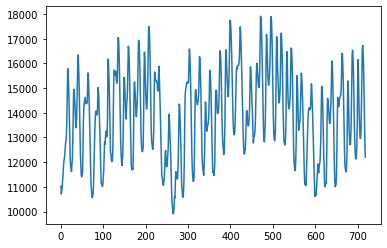

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
a = list(range(719))
ne_url ='https://raw.githubusercontent.com/sy2657/representation_learning/master/neweng_jan2020.csv'
edataset = pd.read_csv(ne_url) 

#print(len(edataset))
plt.plot(a, edataset['iso'])
plt.show()


In [4]:
!python my_app7.py

Traceback (most recent call last):
  File "my_app7.py", line 1, in <module>
    import dash
ModuleNotFoundError: No module named 'dash'


In [0]:
# try individually 